# 실습예제 : 타이타닉 생존자 예측

- 캐글에서 제공하는 타이타닉 탑승자 데이터 
- April 15, 1912
    
- https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

In [3]:
a=10
b=12
a+b
print(a)

10


In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

In [6]:
df.groupby(by='target')

## 1. 데이터 파악

In [7]:
titan = pd.read_csv('titanic/train.csv')
titan.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titan.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
인코딩
매핑함수 == labelencoding 1 2 3 4 5 회귀문제 
binary encoding
one hot encoding   

## 2.  데이터 전처리

### 1) 결측치 파악 및 처리
- isnull()/isna()
- fillna() 

In [10]:
titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titan['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
titan['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
titan['Age'].mean()

np.float64(29.69911764705882)

In [15]:
titan['Age'] = titan['Age'].fillna(titan['Age'].mean())

In [16]:
titan['Cabin'] = titan['Cabin'].fillna('N')

In [17]:
titan['Embarked'] = titan.Embarked.fillna('N')

In [20]:
titan.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
def fillna(df):
    df_ = df.copy()
    df_['Age'] = df_.Age.fillna(df_._Age.mean())
    df_['Cabin'] = df_.Cabin.fillna('N')
    df_['Embarked'] = df_.Embarked.fillna('N')
    return df_
    

In [22]:
df = pd.read_csv('titanic/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
titan['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [30]:
titan['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [31]:
titan['Cabin'].value_counts()

Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [37]:
titan.columns[titan.dtypes == 'int64']

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

### 3) 문자열 변수 Cabin값 변경

In [43]:
titan['Cabin'] = titan['Cabin'].str[:1]

In [44]:
titan['Cabin'].value_counts().sort_index()

Cabin
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
Name: count, dtype: int64

In [45]:
titan.groupby(by=['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 4) 성별에 따른 생존자수 분포(EDA)

<Axes: xlabel='Pclass', ylabel='count'>

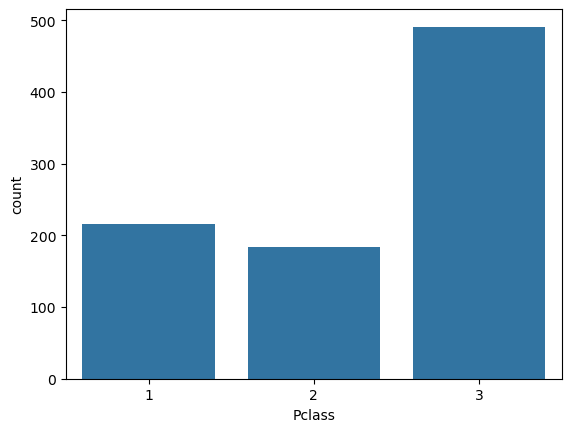

In [47]:
import seaborn as sns
sns.countplot(data=titan, x='Pclass')

<Axes: xlabel='Pclass', ylabel='Survived'>

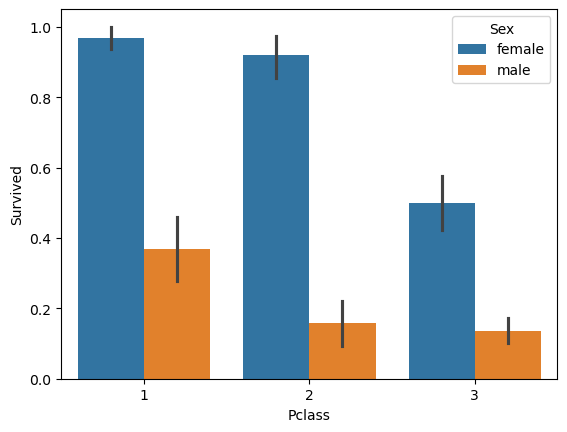

In [49]:
sns.barplot(data=titan, x='Pclass', y='Survived',hue='Sex')

위에서 구한 성별에 따른 생존자 분할표를 사용해 성별에 따른 생존 분포가 다른지 검정 수행

In [50]:
titan.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [51]:
freq = titan.groupby(['Sex','Survived'])['Survived'].count()
freq.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [52]:
type(freq)

pandas.core.series.Series

In [54]:
table = freq.unstack()
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [59]:
from scipy.stats import chi2_contingency
stat, p ,dof ,ex = chi2_contingency(table, correction=False)
print(f'chi_stat:{stat:.4f},p:{p}')

chi_stat:263.0506,p:3.711747770113424e-59


### 5) 수치형 변수의 구간화(binning)

#### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [60]:
titan['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [62]:
bins=[0,5,12,18,35,60,100]
labels=['Baby','Child','TeenAger','YoungAdult','Adult','Elderly']
titan['Age_cut'] = pd.cut(titan.Age, bins=bins, labels = labels)
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,YoungAdult


In [63]:
titan['Age_cut'].value_counts().sort_index()

Age_cut
Baby           44
Child          25
TeenAger       70
YoungAdult    535
Adult         195
Elderly        22
Name: count, dtype: int64

### 6) 인코딩(encoding)

- Sex, Cabin, Embarked 변수에 대하여 레이블 인코딩

In [64]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(titan['Sex'])
result = enc.transform(titan['Sex'])
result[:20]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [65]:
def encode_ftrs(df):
    df_ = df.copy()
    for col in ['Sex','Cabin','Embarked']:
        enc = LabelEncoder()
        enc.fit(df_[col])
        df_[col] = enc.transform(df[col])
    return df_

In [66]:
titan2 = encode_ftrs(titan)
titan2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,YoungAdult


### 7) 삭제

- PassengerId, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [67]:
titan2.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [68]:
titan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     891 non-null    int64   
 8   Embarked  891 non-null    int64   
 9   Age_cut   891 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 63.9 KB


### 전처리 함수 작성

---

## 3. 생존자 예측 모델링

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [75]:
src = pd.read_csv('titanic/train.csv')
y = titan2['Survived']
X = titan2.drop(columns=['Survived','Age_cut'],axis=1)

In [77]:
X['Cabin'].value_counts()

Cabin
7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: count, dtype: int64

### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

### 3단계. Data Split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020158011)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

- 3개의 분류 알고리즘으로 예측 수행하고 평가
    - 결정 트리 : DecisionTreeClassifier
    - 랜덤 포레스트 : RandomForestClassifier
    - 로지스틱 회귀 : LogisticRegression   
- 예측 성능 평가 지표 : accuracy_score()

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score)

In [81]:
dt_clf = DecisionTreeClassifier(random_state=2020158011)
rf_clf = RandomForestClassifier(random_state=2020158011)
lr_clf = LogisticRegression(solver='liblinear')
kn_clf = KNeighborsClassifier()

for model in [dt_clf, rf_clf, lr_clf, kn_clf]:
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f'{model} : \t accuracy : {score:.4f}')

DecisionTreeClassifier(random_state=2020158011)

DecisionTreeClassifier(random_state=2020158011) : 	 accuracy : 0.7989


RandomForestClassifier(random_state=2020158011)

RandomForestClassifier(random_state=2020158011) : 	 accuracy : 0.8045


LogisticRegression(solver='liblinear')

LogisticRegression(solver='liblinear') : 	 accuracy : 0.8380


KNeighborsClassifier()

KNeighborsClassifier() : 	 accuracy : 0.7542


In [ ]:
SVC

In [82]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0)
models, predictions = clf.fit(X_train,X_test, y_train,y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

In [85]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)
svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [86]:
lr_clf.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

### 5단계. 교차 검증을 통한 모델 성능 향상

- 결정 트리 모델에 대하여 교차검증
- KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

#### 1) KFold를 이용한 교차검증

In [88]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [97]:
def exec_KFold(model, X, y, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    for i,(train_idx, test_idx) in enumerate(kfold.split(X)):
       X_train, X_test = X.values[train_idx], X.values[test_idx]
       y_train, y_test = y.values[train_idx], y.values[test_idx]

       model.fit(X_train, y_train)
       pred = model.predict(X_test)
       score = accuracy_score(y_test, pred)
       print(f'CV={i+1} : \t accuracy : {score:.4f}')
       scores.append(score)
    print(f'mean accuracy score:{np.mean(score):.4f}')

In [99]:
for model in [dt_clf, rf_clf, lr_clf, kn_clf,svc]:
    print(f'##{model} -----------------')
    exec_KFold(model, X, y, folds=5)
    print()

##DecisionTreeClassifier(random_state=2020158011) -----------------
CV=1 : 	 accuracy : 0.7486
CV=2 : 	 accuracy : 0.7640
CV=3 : 	 accuracy : 0.7865
CV=4 : 	 accuracy : 0.7753
CV=5 : 	 accuracy : 0.8202
mean accuracy score:0.8202

##RandomForestClassifier(random_state=2020158011) -----------------
CV=1 : 	 accuracy : 0.7765
CV=2 : 	 accuracy : 0.7978
CV=3 : 	 accuracy : 0.8202
CV=4 : 	 accuracy : 0.7809
CV=5 : 	 accuracy : 0.8596
mean accuracy score:0.8596

##LogisticRegression(solver='liblinear') -----------------
CV=1 : 	 accuracy : 0.7933
CV=2 : 	 accuracy : 0.7921
CV=3 : 	 accuracy : 0.7753
CV=4 : 	 accuracy : 0.7472
CV=5 : 	 accuracy : 0.8427
mean accuracy score:0.8427

##KNeighborsClassifier() -----------------
CV=1 : 	 accuracy : 0.6592
CV=2 : 	 accuracy : 0.6742
CV=3 : 	 accuracy : 0.6966
CV=4 : 	 accuracy : 0.7135
CV=5 : 	 accuracy : 0.7416
mean accuracy score:0.7416

##SVC() -----------------
CV=1 : 	 accuracy : 0.5866
CV=2 : 	 accuracy : 0.6685
CV=3 : 	 accuracy : 0.6685
CV=

#### 2) cross_val_score()를 이용해 교차 검증 수행

In [104]:
for model in [dt_clf, rf_clf, lr_clf, kn_clf,svc]:
    print(f'##{model} -----------------')
    scores = cross_val_score(model, X, y, cv=5)
    print(f'mean accuracy score={np.mean(scores):.4f}')

##DecisionTreeClassifier(random_state=2020158011) -----------------
mean accuracy score=0.7834
##RandomForestClassifier(random_state=2020158011) -----------------
mean accuracy score=0.8081
##LogisticRegression(solver='liblinear') -----------------
mean accuracy score=0.7868
##KNeighborsClassifier() -----------------
mean accuracy score=0.7037
##SVC() -----------------
mean accuracy score=0.6724


### 6단계. 하이퍼파라미터 튜닝

- GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

In [108]:
#RandomForestClassifier()
params = {'max_depth':[2,3,5,10],
         'min_samples_leaf':[1,5,8],
         'min_samples_split':[2,3,5]}
grid = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
result_df = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
best_clf = grid.best_estimator_
pred = best_clf.predict(X_test)
print(result_df)
print(f'Best parameter: {grid.best_params_}')
print(f'Best model : {grid.best_score_:.4f}')
print(f'Best predict score:  {accuracy_score(y_test, pred):.4f}')

                                               params  mean_test_score  \
0   {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...             0.80   
1   {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...             0.80   
2   {'max_depth': 2, 'min_samples_leaf': 1, 'min_s...             0.80   
3   {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...             0.80   
4   {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...             0.80   
5   {'max_depth': 2, 'min_samples_leaf': 5, 'min_s...             0.80   
6   {'max_depth': 2, 'min_samples_leaf': 8, 'min_s...             0.80   
7   {'max_depth': 2, 'min_samples_leaf': 8, 'min_s...             0.80   
8   {'max_depth': 2, 'min_samples_leaf': 8, 'min_s...             0.80   
9   {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...             0.80   
10  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...             0.80   
11  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...             0.80   
12  {'max_depth': 3, 'min_samples_leaf

In [109]:
from sklearn.metrics import (confusion_matrix,
                                accuracy_score,
                                precision_score,
                                recall_score,
                                f1_score,
                                roc_auc_score,
                                precision_recall_curve,
                                roc_curve)

------------------------------------------------

In [110]:
confusion_matrix(y_test,pred)

array([[100,  10],
       [ 21,  48]])

In [111]:
f1_score(y_test,pred)

0.7559055118110236

In [113]:
pred_proba = best_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.92384006, 0.07615994],
       [0.16855157, 0.83144843],
       [0.27766631, 0.72233369],
       [0.92148834, 0.07851166],
       [0.9030098 , 0.0969902 ],
       [0.87347629, 0.12652371],
       [0.83951233, 0.16048767],
       [0.89983892, 0.10016108],
       [0.87266125, 0.12733875],
       [0.93715929, 0.06284071]])

In [114]:
from sklearn.preprocessing import Binarizer

Binarizer(threshold=0.5).fit_transform(pred_proba[:,1].reshape(-1,1))

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [116]:
pred_ = pred_proba[:,1].reshape(-1,1)
pred_.shape

(179, 1)

In [117]:
pred_b = Binarizer(threshold=0.4).fit_transform(pred_)
pd.Series(pred_b.reshape(-1)).value_counts()

0.00    108
1.00     71
Name: count, dtype: int64

In [119]:
def print_eval_score(y_test,y_pred):
    mat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    g = np.sqrt(precision * recall)
    print(f'confusion matrix:\n{mat}')
    print(f'accuracy : {acc:.4f}, recall : {recall:.4f}, precision : {precision:.4f}')
    print(f'f1: {f1:.4f}, g-measure: {g:.4f}')

In [120]:
print_eval_score(y_test, pred)

confusion matrix:
[[100  10]
 [ 21  48]]
accuracy : 0.8268, recall : 0.6957, precision : 0.8276
f1: 0.7559, g-measure: 0.7588


In [125]:
def print_eval_by_threshold(y_test,pred_proba_c1, threshold=0.5):
    pred_b = Binarizer(threshold=0.6).fit_transform(pred_proba_c1)
    print(f'threshold={threshold} ------------')
    print_eval_score(y_test,pred_b)
    print()

In [127]:
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    print_eval_by_threshold(y_test, pred_, threshold=threshold)

threshold=0.1 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.2 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.3 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.4 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.5 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.6 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy : 0.8324, recall : 0.6667, precision : 0.8679
f1: 0.7541, g-measure: 0.7607

threshold=0.7 ------------
confusion matrix:
[[103   7]
 [ 23  46]]
accuracy

In [128]:
roc_curve(y_test, pred_)

(array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
        0.00909091, 0.00909091, 0.01818182, 0.01818182, 0.02727273,
        0.02727273, 0.02727273, 0.02727273, 0.03636364, 0.03636364,
        0.04545455, 0.04545455, 0.09090909, 0.09090909, 0.11818182,
        0.11818182, 0.12727273, 0.12727273, 0.14545455, 0.14545455,
        0.15454545, 0.15454545, 0.19090909, 0.19090909, 0.24545455,
        0.24545455, 0.25454545, 0.25454545, 0.27272727, 0.27272727,
        0.32727273, 0.32727273, 0.33636364, 0.33636364, 0.38181818,
        0.38181818, 0.39090909, 0.40909091, 0.5       , 0.50909091,
        0.50909091, 0.54545455, 0.56363636, 0.66363636, 0.66363636,
        0.69090909, 0.69090909, 0.74545455, 0.78181818, 0.8       ,
        0.83636364, 0.85454545, 0.87272727, 0.93636364, 0.95454545,
        0.97272727, 0.97272727, 0.98181818, 1.        ]),
 array([0.        , 0.01449275, 0.24637681, 0.24637681, 0.44927536,
        0.47826087, 0.52173913, 0.52173913, 0.55072464, 0.

In [134]:
def roc_curve_plot(y_test, pred_proba_c1):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fpr,tpr, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

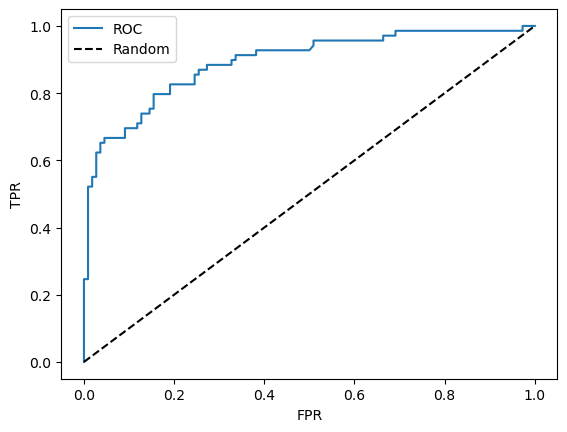

In [135]:
roc_curve_plot(y_test, pred_)

In [136]:
roc_auc_score(y_test, pred_)

np.float64(0.8925559947299078)

In [154]:
def print_eval_score(y_test,y_pred, y_pred_proba_c1=None):
    mat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    g = np.sqrt(precision * recall)
    roc = roc_auc_score(y_test, y_pred_proba_c1)
    print(f'confusion matrix:\n {mat}')
    print(f'accuracy : {acc:.4f}, recall : {recall:.4f}, precision : {precision:.4f}', end=' ')
    print(f'f1: {f1:.4f}, g-measure: {g:.4f}',end=' ')
    if y_pred_proba_c1 is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba_c1)
        print(f'AUC: {roc_auc:.4f}')
    
    print()
    print(classification_report(y_test,y_pred))
 
    

In [155]:
print_eval_score(y_test,pred, pred_)

confusion matrix:
 [[100  10]
 [ 21  48]]
accuracy : 0.8268, recall : 0.6957, precision : 0.8276 f1: 0.7559, g-measure: 0.7588 AUC: 0.8926

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [ ]:
precision_recall

In [158]:
def precision_recall_curve_plot(y_test, y_pred_proba_c1):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_c1)
    plt.plot(thresholds, precision[:-1], label='precision')
    plt.plot(thresholds, recall[:-1], label='recall')
    plt.xlabel('thresholds')
    plt.ylabel('Precision & recall')
    plt.xticks(np.arange(0,1,0.1))
    plt.grid()
    plt.show()

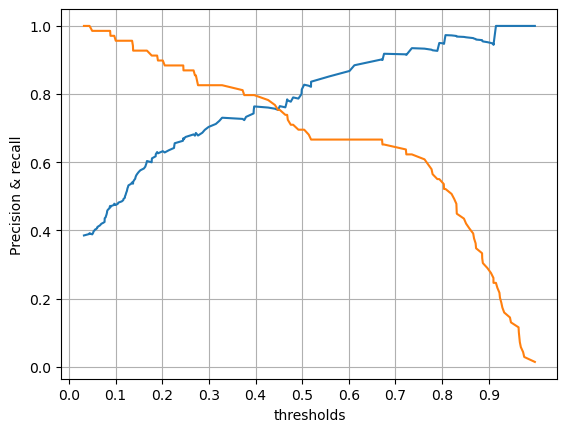

In [159]:
precision_recall_curve_plot(y_test,pred_)